**0. Importing Packages** **and Loading Dataset**

In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from google.colab import files
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import cross_val_score
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00


In [4]:
import optuna

In [5]:
drive.mount('content')
data_path = "content/MyDrive/IE343/"

Mounted at content


In [6]:
train_path = os.path.join(data_path,'train_data.csv')
test_path = os.path.join(data_path, 'test_data.csv')
train_data= pd.read_csv(train_path)
test_data= pd.read_csv(test_path)


**1.Preprocessing and EDA**





In [7]:

# Define the features to drop based on the previous correlation analysis
features_to_drop = ['sex','famsup']

# Drop the low-correlation features from both training and test sets
train_data = train_data.drop(columns=features_to_drop)
test_data = test_data.drop(columns=features_to_drop)

In [ ]:
train_data

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,GRADE
0,GP,16,U,GT3,T,1,2,teacher,other,reputation,...,yes,no,4,4,1,1,1,3,0,2
1,MS,16,R,LE3,T,4,3,other,other,home,...,yes,no,5,4,2,1,2,5,0,0
2,MS,18,R,GT3,T,1,1,at_home,at_home,course,...,yes,yes,3,2,3,1,1,2,4,2
3,MS,15,U,LE3,T,4,3,other,at_home,course,...,no,yes,5,1,5,2,1,4,0,2
4,MS,17,U,GT3,T,4,4,at_home,services,home,...,yes,no,4,3,2,1,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,GP,17,U,GT3,A,3,2,other,services,home,...,yes,no,2,3,5,1,2,5,1,1
2433,MS,17,U,GT3,T,2,2,at_home,other,course,...,yes,no,4,3,3,5,2,5,0,0
2434,MS,19,U,GT3,A,4,2,health,services,other,...,yes,no,5,2,5,2,2,3,1,2
2435,GP,18,R,GT3,T,3,1,other,other,course,...,yes,yes,2,4,3,1,4,5,0,1


In [8]:
# Count the occurrences of each grade
grade_counts = train_data['GRADE'].value_counts()

# Calculate the percentage of each grade
grade_percentages = (grade_counts / len(train_data)) * 100

# Display the percentages
print("Percentage of each grade in the training data:")
print(grade_percentages)

Percentage of each grade in the training data:
GRADE
2    37.735849
0    25.348646
1    20.672683
4     6.644791
5     4.183757
3     3.814602
6     1.599672
Name: count, dtype: float64


In [ ]:
test_data

,school,age,address,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,...,paid,activities,higher,internet,romantic,famrel,Dalc,Walc,health,absences
0,MS,18,R,2,4,other,other,course,2,1,...,no,yes,yes,no,no,4,1,2,4,0
1,GP,18,R,1,2,other,other,course,2,1,...,yes,no,yes,yes,no,4,1,2,3,0
2,GP,16,U,4,4,at_home,services,course,2,2,...,no,yes,yes,yes,no,4,1,1,2,0
3,GP,17,U,2,2,at_home,at_home,home,1,2,...,no,no,yes,yes,yes,3,1,2,4,0
4,MS,16,U,3,2,services,at_home,course,1,1,...,no,yes,yes,yes,yes,5,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MS,16,R,4,4,teacher,teacher,course,2,3,...,no,yes,yes,yes,yes,4,1,1,4,6
606,MS,18,R,4,1,at_home,other,home,1,1,...,no,no,yes,yes,no,3,1,1,4,0
607,MS,15,R,1,1,other,other,course,2,2,...,no,no,yes,yes,yes,4,3,1,4,0
608,MS,17,U,3,4,at_home,services,other,2,2,...,no,no,yes,no,no,5,4,4,3,0


In [ ]:
train_data.isna().sum()

school        0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
GRADE         0
dtype: int64

In [ ]:
test_data

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,MS,18,R,GT3,T,2,4,other,other,course,...,yes,no,no,4,3,3,1,2,4,0
1,GP,18,R,LE3,T,1,2,other,other,course,...,yes,yes,no,4,5,3,1,2,3,0
2,GP,16,U,GT3,T,4,4,at_home,services,course,...,yes,yes,no,4,1,5,1,1,2,0
3,GP,17,U,GT3,A,2,2,at_home,at_home,home,...,yes,yes,yes,3,3,1,1,2,4,0
4,MS,16,U,LE3,T,3,2,services,at_home,course,...,yes,yes,yes,5,4,5,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MS,16,R,GT3,T,4,4,teacher,teacher,course,...,yes,yes,yes,4,2,2,1,1,4,6
606,MS,18,R,GT3,T,4,1,at_home,other,home,...,yes,yes,no,3,3,4,1,1,4,0
607,MS,15,R,GT3,T,1,1,other,other,course,...,yes,yes,yes,4,3,3,3,1,4,0
608,MS,17,U,GT3,T,3,4,at_home,services,other,...,yes,no,no,5,2,2,4,4,3,0


In [9]:
test_data['GRADE'] = pd.Series(dtype='int') # create GRADE column for test data, filled with NaN
full_data = pd.concat([train_data, test_data]) # combine the training and test data for analysis

full_data

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,GRADE
0,GP,16,U,GT3,T,1,2,teacher,other,reputation,...,yes,no,4,4,1,1,1,3,0,2.0
1,MS,16,R,LE3,T,4,3,other,other,home,...,yes,no,5,4,2,1,2,5,0,0.0
2,MS,18,R,GT3,T,1,1,at_home,at_home,course,...,yes,yes,3,2,3,1,1,2,4,2.0
3,MS,15,U,LE3,T,4,3,other,at_home,course,...,no,yes,5,1,5,2,1,4,0,2.0
4,MS,17,U,GT3,T,4,4,at_home,services,home,...,yes,no,4,3,2,1,1,5,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MS,16,R,GT3,T,4,4,teacher,teacher,course,...,yes,yes,4,2,2,1,1,4,6,NaN
606,MS,18,R,GT3,T,4,1,at_home,other,home,...,yes,no,3,3,4,1,1,4,0,NaN
607,MS,15,R,GT3,T,1,1,other,other,course,...,yes,yes,4,3,3,3,1,4,0,NaN
608,MS,17,U,GT3,T,3,4,at_home,services,other,...,no,no,5,2,2,4,4,3,0,NaN


In [10]:
# change categorical data into numerical data

cat_cols = list(full_data.select_dtypes('object'))

full_data = pd.get_dummies(full_data, columns = cat_cols)

full_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,16,1,2,2,2,0,4,4,1,1,...,False,True,False,True,False,True,False,True,True,False
1,16,4,3,2,2,0,5,4,2,1,...,True,False,False,True,False,True,False,True,True,False
2,18,1,1,2,1,1,3,2,3,1,...,True,False,True,False,True,False,False,True,False,True
3,15,4,3,2,1,2,5,1,5,2,...,False,True,False,True,True,False,True,False,False,True
4,17,4,4,2,1,0,4,3,2,1,...,True,False,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,16,4,4,2,3,0,4,2,2,1,...,False,True,False,True,False,True,False,True,False,True
606,18,4,1,1,1,0,3,3,4,1,...,True,False,False,True,False,True,False,True,True,False
607,15,1,1,2,2,0,4,3,3,3,...,True,False,False,True,False,True,False,True,False,True
608,17,3,4,2,2,1,5,2,2,4,...,True,False,False,True,False,True,True,False,True,False


In [13]:

train = full_data[:train_data.shape[0]] # split the preprocessed full data back into training and test data
test = full_data[train_data.shape[0]:]

X_train = train.drop(["GRADE"], axis=1).copy().to_numpy() # isolate the GRADE column for prediction
y_train = train["GRADE"].copy().to_numpy()

X_test = test.drop(["GRADE"], axis=1).copy().to_numpy() # remove the GRADE column

sc = StandardScaler() # scale the data to be in similar range
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

GRADE                1.000000
absences             0.197394
higher_yes           0.132989
Medu                 0.121101
reason_reputation    0.093743
schoolsup_no         0.084494
school_GP            0.084345
Fjob_teacher         0.071598
studytime            0.068604
Fedu                 0.067399
romantic_no          0.059654
Mjob_health          0.058905
address_U            0.053829
internet_yes         0.051161
Mjob_services        0.051042
activities_yes       0.040814
famrel               0.033791
reason_home          0.033762
guardian_father      0.027271
Mjob_teacher         0.020640
paid_no              0.012604
famsize_LE3          0.007793
nursery_no           0.007135
Pstatus_T            0.006658
guardian_mother      0.004103
Fjob_other          -0.001022
Pstatus_A           -0.006658
nursery_yes         -0.007135
Mjob_other          -0.007542
famsize_GT3         -0.007793
Fjob_services       -0.010118
paid_yes            -0.012604
Fjob_health         -0.016144
traveltime

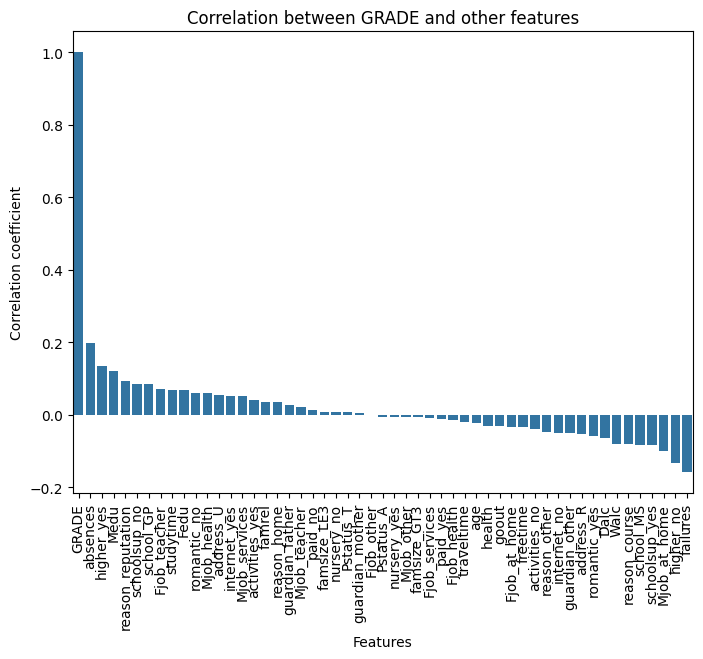

In [14]:
# Compute the correlation matrix
correlation_matrix = full_data.corr()

# Extract the correlations with 'GRADE'
grade_correlations = correlation_matrix['GRADE'].sort_values(ascending=False)

# Print the correlations for debugging
print(grade_correlations)

# Visualize the correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=grade_correlations.index, y=grade_correlations.values)
plt.xticks(rotation=90)
plt.title('Correlation between GRADE and other features')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.show()

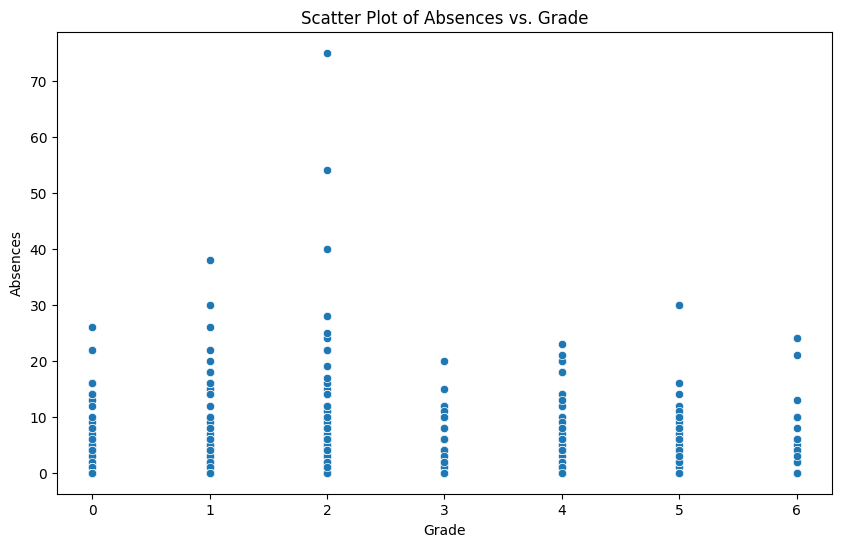

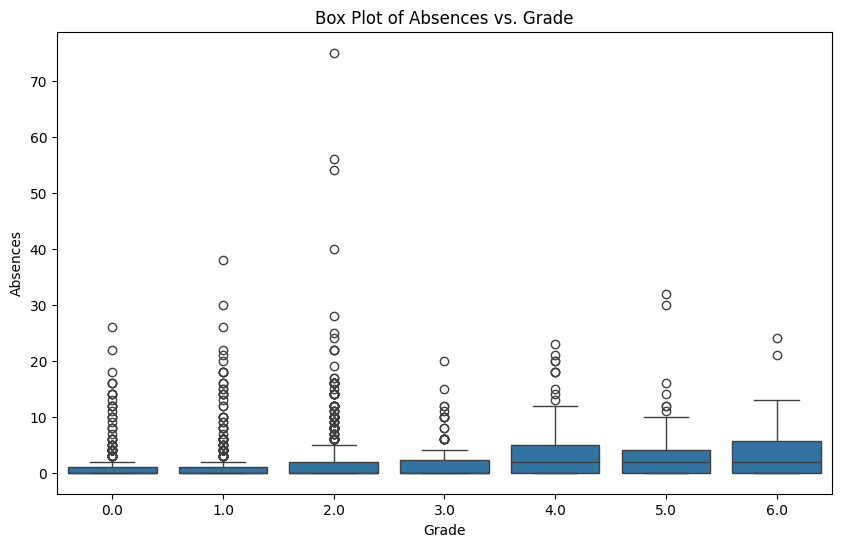

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GRADE', y='absences', data=train_data)
plt.title('Scatter Plot of Absences vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Absences')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='GRADE', y='absences', data=full_data)
plt.title('Box Plot of Absences vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Absences')
plt.show()

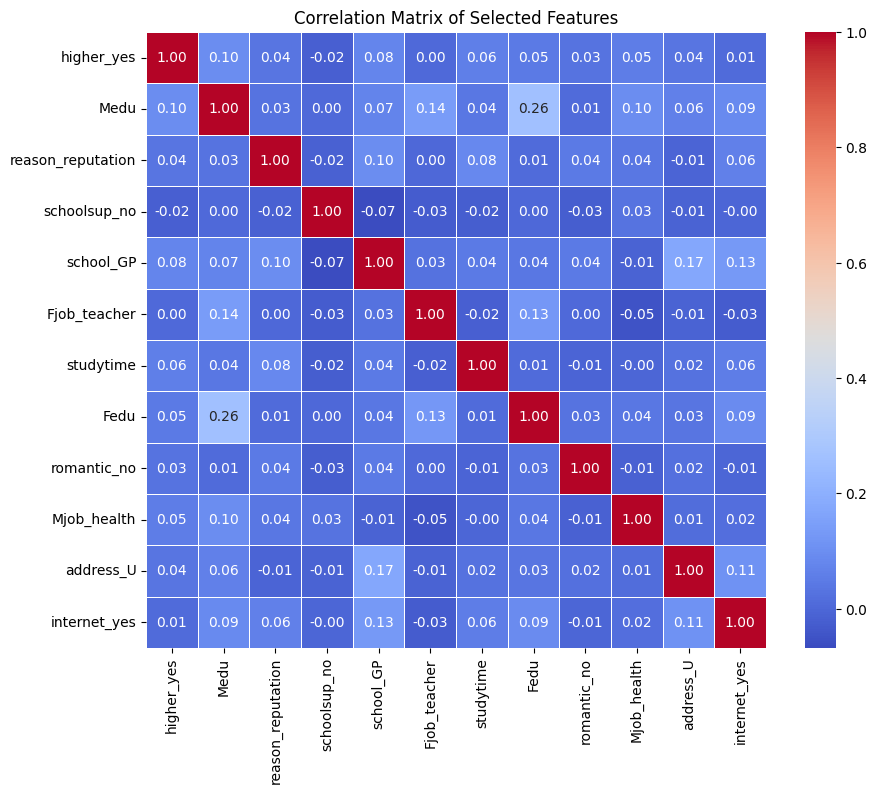

In [ ]:


selected_features = ['higher_yes', 'Medu', 'reason_reputation', 'schoolsup_no',
                     'school_GP', 'Fjob_teacher', 'studytime', 'Fedu', 'romantic_no',
                     'Mjob_health', 'address_U', 'internet_yes']

# Extract the subset of the DataFrame with the selected features
subset_data = full_data[selected_features]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [ ]:
full_data.isna().sum()

school          0
age             0
address         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
traveltime      0
studytime       0
failures        0
schoolsup       0
paid            0
activities      0
higher          0
internet        0
romantic        0
famrel          0
Dalc            0
Walc            0
health          0
absences        0
GRADE         610
dtype: int64

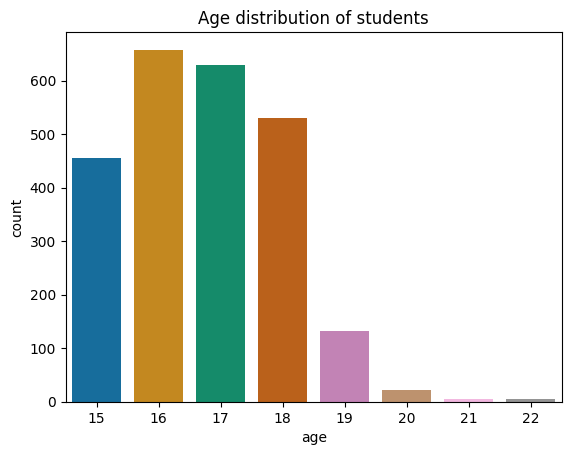

In [ ]:
import matplotlib.pyplot as plt


sns.countplot(x='age', data=train_data, palette=sns.color_palette('colorblind', len(train_data['age'].unique())))
plt.title('Age distribution of students')
plt.show()

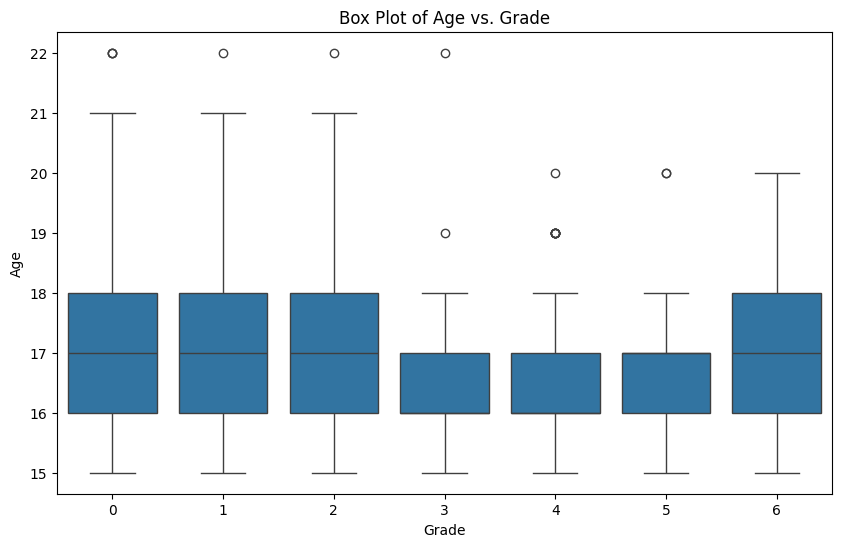

In [ ]:


# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='GRADE', y='age', data=train_data)
plt.title('Box Plot of Age vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Age')
plt.show()

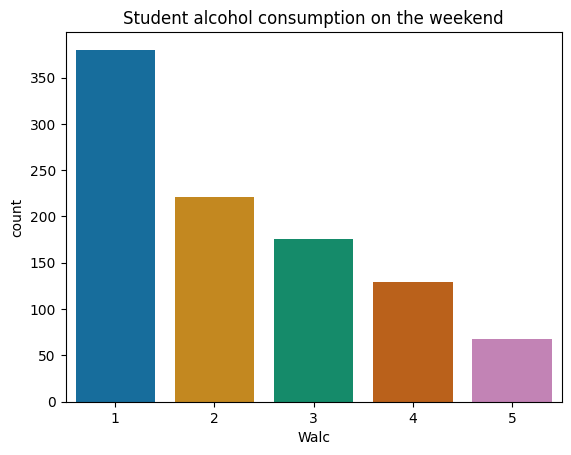

In [ ]:
sns.countplot(x='Walc', data=train_data, palette=sns.color_palette('colorblind', len(train_data['Walc'].unique())))
plt.title('Student alcohol consumption on the weekend')
plt.show()

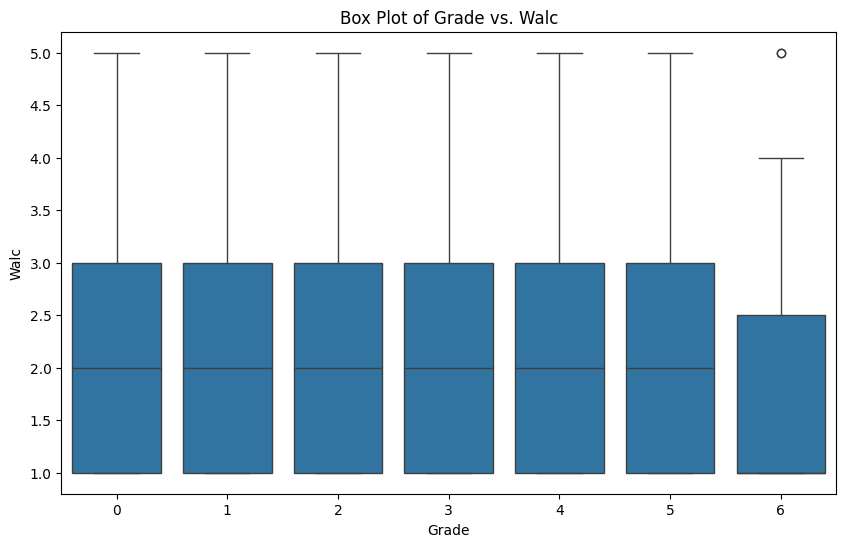

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='GRADE', y='Walc', data=train_data)
plt.title('Box Plot of Grade vs. Walc')
plt.xlabel('Grade')
plt.ylabel('Walc')
plt.show()

There is no clear pattern or significant difference in weekend alcohol consumption between students with different grades. However, grade 6 shows a slightly different pattern with a lower median and less variability, except for the presence of an outlier. For grades 0 to 5, the median is fairly similar, indicating that the typical level of weekend alcohol consumption does not vary much across these grades.

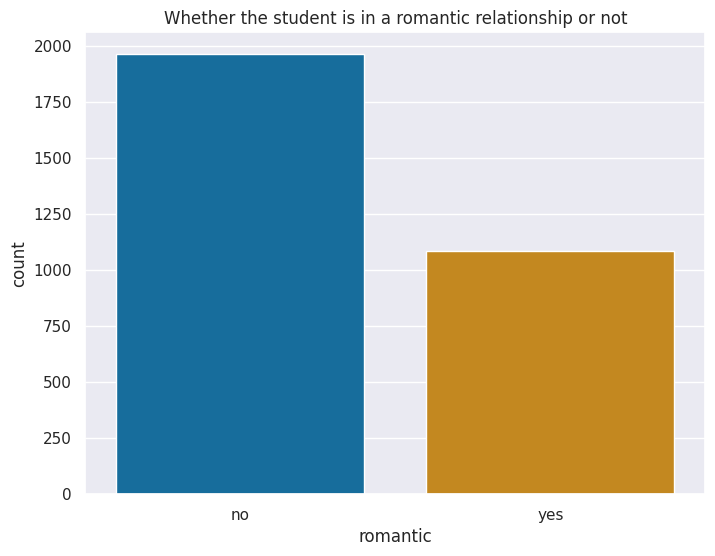

In [ ]:
sns.countplot(x='romantic', data=full_data, palette=sns.color_palette('colorblind', len(full_data['romantic'].unique())))
plt.title('Whether the student is in a romantic relationship or not')
plt.show()

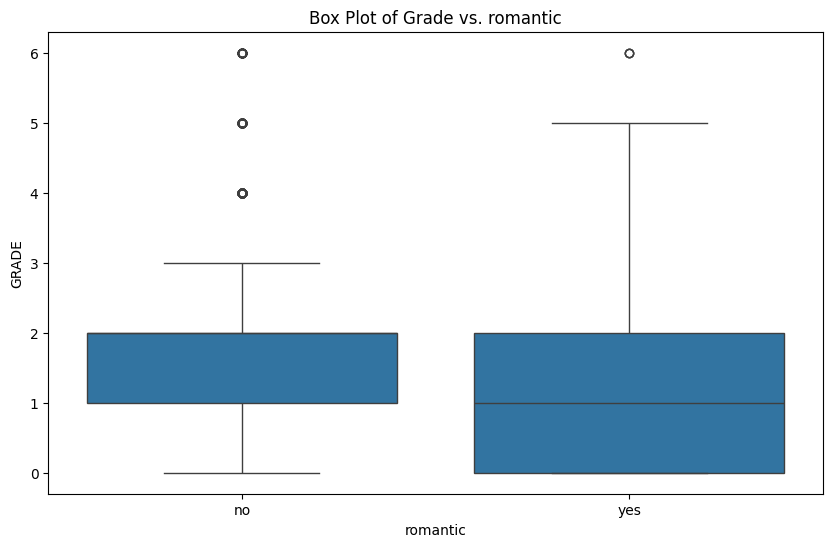

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='romantic', y='GRADE', data=train_data)
plt.title('Box Plot of Grade vs. romantic')
plt.xlabel('romantic')
plt.ylabel('GRADE')
plt.show()

There does not appear to be a strong difference in grade distribution between students who are in romantic relationships and those who are not.

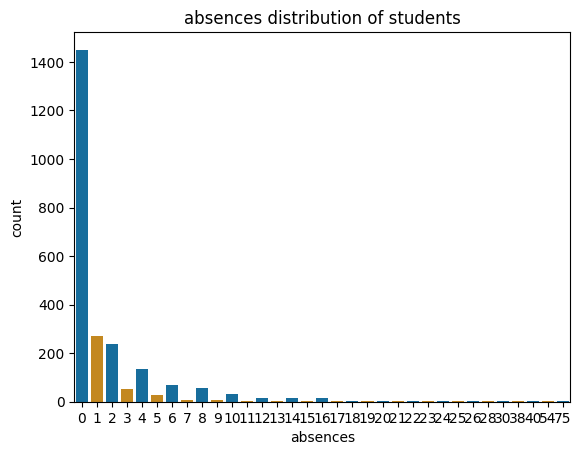

In [ ]:

sns.countplot(x='absences', data=train_data, palette=sns.color_palette('colorblind', len(train_data['higher'].unique())))
plt.title('absences distribution of students')
plt.show()

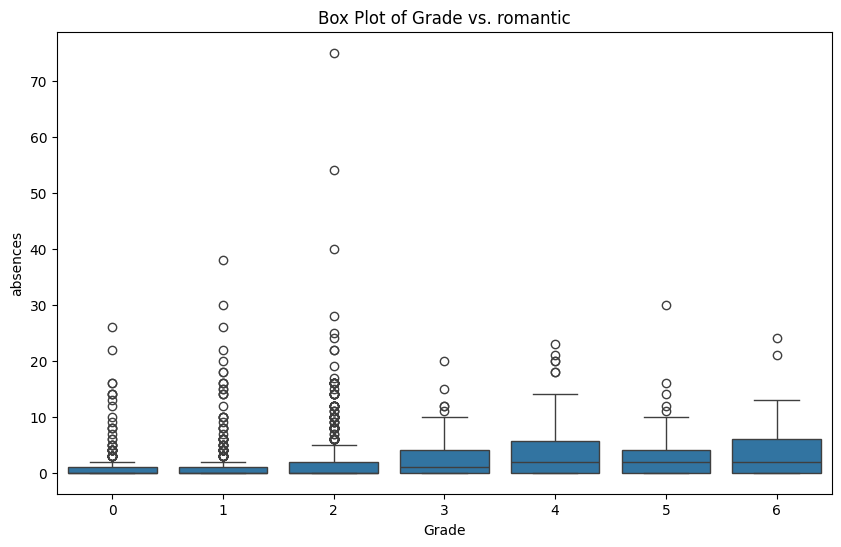

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GRADE', y='absences', data=train_data)
plt.title('Box Plot of Grade vs. romantic')
plt.xlabel('Grade')
plt.ylabel('absences')
plt.show()

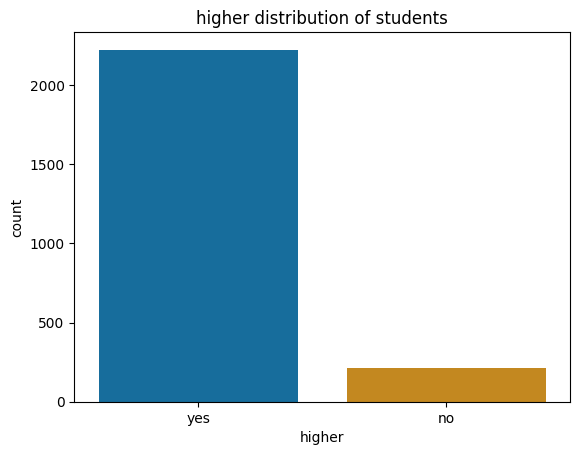

In [ ]:


sns.countplot(x='higher', data=train_data, palette=sns.color_palette('colorblind', len(train_data['higher'].unique())))
plt.title('higher distribution of students')
plt.show()

In [ ]:
# almost all students want to go to higher education, so it seems this not a big factor that differentiates between student grades

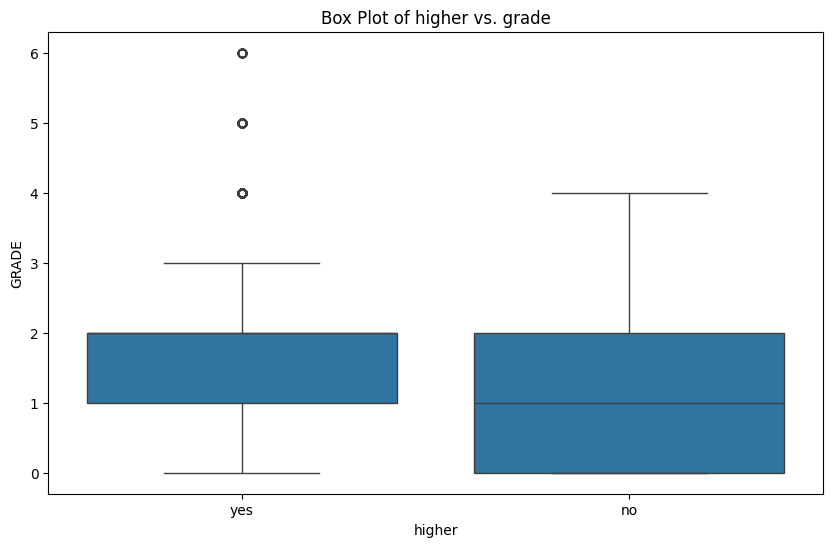

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='higher', y='GRADE', data=train_data)
plt.title('Box Plot of higher vs. grade')
plt.xlabel('higher')
plt.ylabel('GRADE')
plt.show()

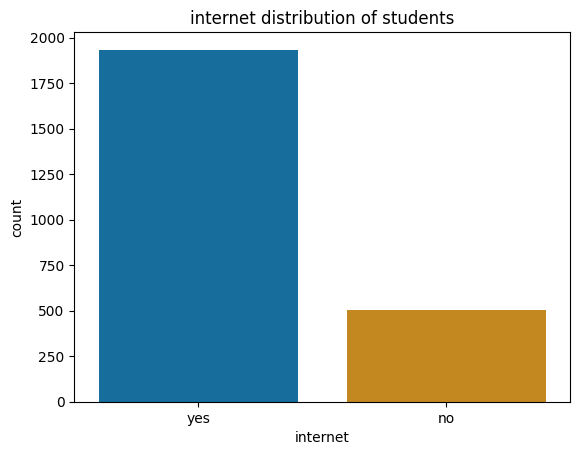

In [ ]:

sns.countplot(x='internet', data=train_data, palette=sns.color_palette('colorblind', len(train_data['internet'].unique())))
plt.title('internet distribution of students')
plt.show()

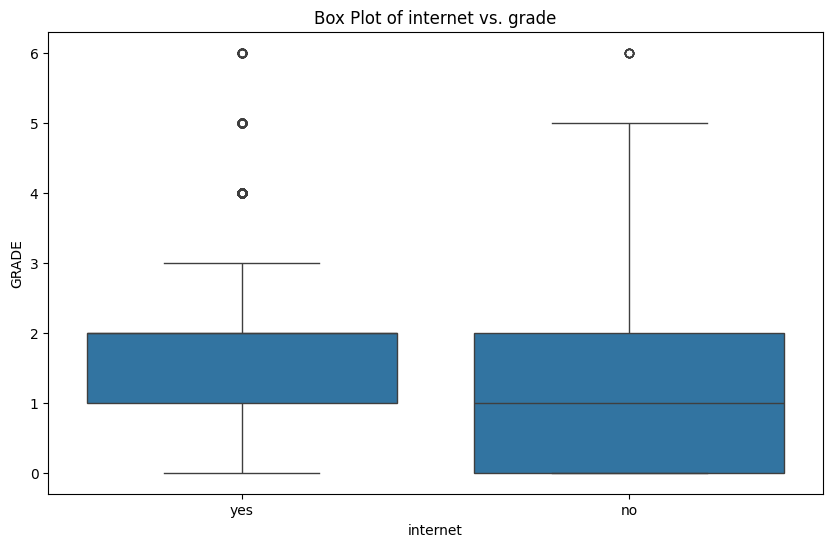

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='internet', y='GRADE', data=train_data)
plt.title('Box Plot of internet vs. grade')
plt.xlabel('internet')
plt.ylabel('GRADE')
plt.show()

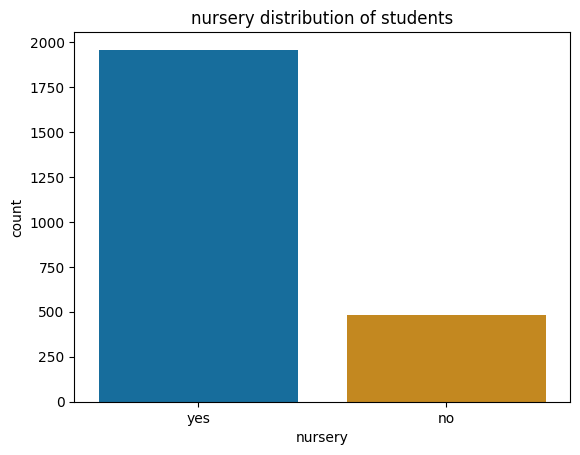

In [ ]:

sns.countplot(x='nursery', data=train_data, palette=sns.color_palette('colorblind', len(train_data['internet'].unique())))
plt.title('nursery distribution of students')
plt.show()

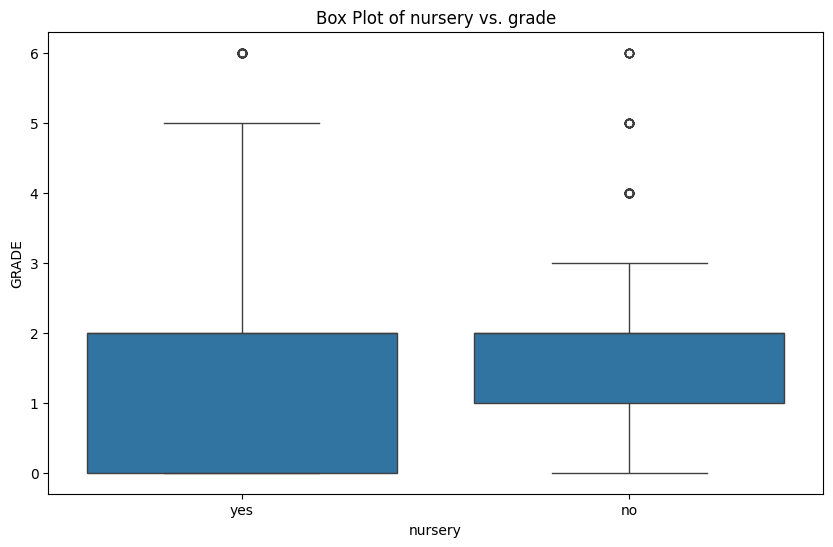

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='nursery', y='GRADE', data=train_data)
plt.title('Box Plot of nursery vs. grade')
plt.xlabel('nursery')
plt.ylabel('GRADE')
plt.show()

In [ ]:
full_data.dtypes # returns the data type for each column

school         object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
GRADE         float64
dtype: object

In [ ]:
full_data.select_dtypes('object') # these columns contain categorical data

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,T,teacher,other,reputation,mother,yes,yes,no,yes,yes,yes,yes,no
1,MS,F,R,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
2,MS,F,R,GT3,T,at_home,at_home,course,mother,no,no,no,no,no,no,yes,yes
3,MS,M,U,LE3,T,other,at_home,course,father,no,yes,no,yes,yes,no,no,yes
4,MS,F,U,GT3,T,at_home,services,home,mother,no,yes,yes,no,yes,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MS,F,R,GT3,T,teacher,teacher,course,mother,no,no,no,yes,yes,yes,yes,yes
606,MS,F,R,GT3,T,at_home,other,home,mother,no,yes,no,no,yes,yes,yes,no
607,MS,F,R,GT3,T,other,other,course,other,no,yes,no,no,yes,yes,yes,yes
608,MS,F,U,GT3,T,at_home,services,other,father,no,no,no,no,yes,yes,no,no


In [ ]:
correlation = full_data['internet_no'].corr(full_data['GRADE'])
print(f'Correlation between internet_no and grade: {correlation}')

correlation = full_data['internet_yes'].corr(full_data['GRADE'])
print(f'Correlation between internet_yes and grade: {correlation}')

Correlation between internet_no and grade: -0.05116070632239124
Correlation between internet_yes and grade: 0.05116070632239122


In [ ]:
full_data.famsize.value_counts(normalize=True)

<Axes: xlabel='GRADE', ylabel='Density'>

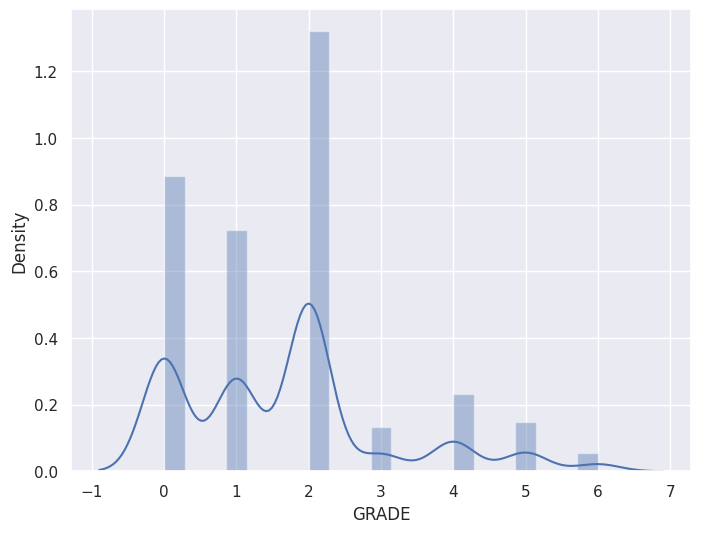

In [ ]:
sns.distplot(train_data.GRADE)

MOST of students got (about 80%) grades of 0,1,2. 2 being the dominant grade

In [ ]:
train_data

,school,age,address,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,...,activities,higher,internet,romantic,famrel,Dalc,Walc,health,absences,GRADE
0,GP,16,U,1,2,teacher,other,reputation,2,2,...,yes,yes,yes,no,4,1,1,3,0,2
1,MS,16,R,4,3,other,other,home,2,2,...,no,yes,yes,no,5,1,2,5,0,0
2,MS,18,R,1,1,at_home,at_home,course,2,1,...,no,no,yes,yes,3,1,1,2,4,2
3,MS,15,U,4,3,other,at_home,course,2,1,...,yes,no,no,yes,5,2,1,4,0,2
4,MS,17,U,4,4,at_home,services,home,2,1,...,no,no,yes,no,4,1,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,MS,17,U,2,2,at_home,other,course,1,3,...,no,no,yes,no,4,5,2,5,0,0
2434,MS,19,U,4,2,health,services,other,1,1,...,no,yes,yes,no,5,2,2,3,1,2
2435,GP,18,R,3,1,other,other,course,1,1,...,no,no,yes,yes,2,1,4,5,0,1
2436,GP,18,R,4,1,teacher,services,other,1,3,...,no,yes,no,no,3,4,2,2,0,1


Grade has a high correlation with

In [ ]:
train = full_data[:train_data.shape[0]] # split the preprocessed full data back into training and test data
test = full_data[train_data.shape[0]:]

In [ ]:
train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,16,1,2,2,2,0,4,4,1,1,...,False,True,False,True,False,True,False,True,True,False
1,16,4,3,2,2,0,5,4,2,1,...,True,False,False,True,False,True,False,True,True,False
2,18,1,1,2,1,1,3,2,3,1,...,True,False,True,False,True,False,False,True,False,True
3,15,4,3,2,1,2,5,1,5,2,...,False,True,False,True,True,False,True,False,False,True
4,17,4,4,2,1,0,4,3,2,1,...,True,False,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,17,2,2,1,3,1,4,3,3,5,...,True,False,False,True,True,False,False,True,True,False
2434,19,4,2,1,1,0,5,2,5,2,...,True,False,False,True,False,True,False,True,True,False
2435,18,3,1,1,1,1,2,4,3,1,...,True,False,False,True,True,False,False,True,False,True
2436,18,4,1,1,3,0,3,4,3,4,...,True,False,False,True,False,True,True,False,True,False


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,16,1,2,2,2,0,4,4,1,1,...,False,True,False,True,False,True,False,True,True,False
1,16,4,3,2,2,0,5,4,2,1,...,True,False,False,True,False,True,False,True,True,False
2,18,1,1,2,1,1,3,2,3,1,...,True,False,True,False,True,False,False,True,False,True
3,15,4,3,2,1,2,5,1,5,2,...,False,True,False,True,True,False,True,False,False,True
4,17,4,4,2,1,0,4,3,2,1,...,True,False,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,17,2,2,1,3,1,4,3,3,5,...,True,False,False,True,True,False,False,True,True,False
2434,19,4,2,1,1,0,5,2,5,2,...,True,False,False,True,False,True,False,True,True,False
2435,18,3,1,1,1,1,2,4,3,1,...,True,False,False,True,True,False,False,True,False,True
2436,18,4,1,1,3,0,3,4,3,4,...,True,False,False,True,False,True,True,False,True,False


In [ ]:
test

,age,Medu,Fedu,traveltime,studytime,failures,famrel,Dalc,Walc,health,...,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,2,4,2,1,0,4,1,2,4,...,True,False,False,True,False,True,True,False,True,False
1,18,1,2,2,1,1,4,1,2,3,...,False,True,True,False,False,True,False,True,True,False
2,16,4,4,2,2,0,4,1,1,2,...,True,False,False,True,False,True,False,True,True,False
3,17,2,2,1,2,1,3,1,2,4,...,True,False,True,False,False,True,False,True,False,True
4,16,3,2,1,1,1,5,1,3,3,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,16,4,4,2,3,0,4,1,1,4,...,True,False,False,True,False,True,False,True,False,True
606,18,4,1,1,1,0,3,1,1,4,...,True,False,True,False,False,True,False,True,True,False
607,15,1,1,2,2,0,4,3,1,4,...,True,False,True,False,False,True,False,True,False,True
608,17,3,4,2,2,1,5,4,4,3,...,True,False,True,False,False,True,True,False,True,False


In [ ]:
train.corr()['GRADE'].sort_values(ascending=False)

GRADE                1.000000
absences             0.197394
Medu                 0.121101
reason_reputation    0.093743
schoolsup_no         0.084494
school_GP            0.084345
Fjob_teacher         0.071598
studytime            0.068604
Fedu                 0.067399
romantic_no          0.059654
Mjob_health          0.058905
address_U            0.053829
internet_yes         0.051161
Mjob_services        0.051042
activities_yes       0.040814
famrel               0.033791
reason_home          0.033762
guardian_father      0.027271
Mjob_teacher         0.020640
paid_no              0.012604
famsize_LE3          0.007793
nursery_no           0.007135
Pstatus_T            0.006658
guardian_mother      0.004103
Fjob_other          -0.001022
Pstatus_A           -0.006658
nursery_yes         -0.007135
Mjob_other          -0.007542
famsize_GT3         -0.007793
Fjob_services       -0.010118
paid_yes            -0.012604
Fjob_health         -0.016144
traveltime          -0.021656
age       

In [ ]:
test

,age,Medu,Fedu,traveltime,studytime,failures,famrel,Dalc,Walc,health,...,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,2,4,2,1,0,4,1,2,4,...,True,False,False,True,False,True,True,False,True,False
1,18,1,2,2,1,1,4,1,2,3,...,False,True,True,False,False,True,False,True,True,False
2,16,4,4,2,2,0,4,1,1,2,...,True,False,False,True,False,True,False,True,True,False
3,17,2,2,1,2,1,3,1,2,4,...,True,False,True,False,False,True,False,True,False,True
4,16,3,2,1,1,1,5,1,3,3,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,16,4,4,2,3,0,4,1,1,4,...,True,False,False,True,False,True,False,True,False,True
606,18,4,1,1,1,0,3,1,1,4,...,True,False,True,False,False,True,False,True,True,False
607,15,1,1,2,2,0,4,3,1,4,...,True,False,True,False,False,True,False,True,False,True
608,17,3,4,2,2,1,5,4,4,3,...,True,False,True,False,False,True,True,False,True,False


In [ ]:
train_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,GRADE
0,0,1,16,1,1,1,1,2,4,2,...,1,0,4,4,1,1,1,3,0,2
1,1,1,16,0,0,1,4,3,2,2,...,1,0,5,4,2,1,2,5,0,0
2,1,1,18,0,1,1,1,1,0,0,...,1,1,3,2,3,1,1,2,4,2
3,1,0,15,1,0,1,4,3,2,0,...,0,1,5,1,5,2,1,4,0,2
4,1,1,17,1,1,1,4,4,0,3,...,1,0,4,3,2,1,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,1,1,17,1,1,1,2,2,0,2,...,1,0,4,3,3,5,2,5,0,0
2434,1,1,19,1,1,0,4,2,1,3,...,1,0,5,2,5,2,2,3,1,2
2435,0,0,18,0,1,1,3,1,2,2,...,1,1,2,4,3,1,4,5,0,1
2436,0,1,18,0,0,0,4,1,4,3,...,0,0,3,4,3,4,2,2,0,1


In [ ]:
test_data

,school,address,Medu,Fedu,Mjob,Fjob,reason,studytime,failures,schoolsup,activities,higher,internet,romantic,famrel,Dalc,Walc,absences,GRADE
0,MS,R,2,4,other,other,course,1,0,no,yes,yes,no,no,4,1,2,0,NaN
1,GP,R,1,2,other,other,course,1,1,yes,no,yes,yes,no,4,1,2,0,NaN
2,GP,U,4,4,at_home,services,course,2,0,no,yes,yes,yes,no,4,1,1,0,NaN
3,GP,U,2,2,at_home,at_home,home,2,1,no,no,yes,yes,yes,3,1,2,0,NaN
4,MS,U,3,2,services,at_home,course,1,1,no,yes,yes,yes,yes,5,1,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MS,R,4,4,teacher,teacher,course,3,0,no,yes,yes,yes,yes,4,1,1,6,NaN
606,MS,R,4,1,at_home,other,home,1,0,no,no,yes,yes,no,3,1,1,0,NaN
607,MS,R,1,1,other,other,course,2,0,no,no,yes,yes,yes,4,3,1,0,NaN
608,MS,U,3,4,at_home,services,other,2,1,no,no,yes,no,no,5,4,4,0,NaN


In [ ]:
y_train

array([2., 0., 2., ..., 1., 1., 3.])

In [ ]:
X_train

array([[-0.58471769, -1.39286436, -0.36548622, ...,  0.51048976,
         0.7562335 , -0.7562335 ],
       [-0.58471769,  1.25459144,  0.53822109, ...,  0.51048976,
         0.7562335 , -0.7562335 ],
       [ 1.01791495, -1.39286436, -1.26919353, ...,  0.51048976,
        -1.3223429 ,  1.3223429 ],
       ...,
       [ 1.01791495,  0.37210618, -1.26919353, ...,  0.51048976,
        -1.3223429 ,  1.3223429 ],
       [ 1.01791495,  1.25459144, -1.26919353, ..., -1.95890316,
         0.7562335 , -0.7562335 ],
       [-1.38603401, -0.51037909, -0.36548622, ..., -1.95890316,
         0.7562335 , -0.7562335 ]])

2. **Evaluation**

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:

models = [
    LinearDiscriminantAnalysis(),  # LDA
    QuadraticDiscriminantAnalysis(),  # QDA
    DecisionTreeRegressor(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(),
    XGBClassifier(),
    KMeans(n_clusters=7)
]


In [ ]:

for model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model.__class__.__name__}: Mean CV score = {cv_scores.mean()}, Std CV score = {cv_scores.std()}")


LinearDiscriminantAnalysis: Mean CV score = 0.3802201501329653, Std CV score = 0.021433521916594273
QuadraticDiscriminantAnalysis: Mean CV score = 0.13165078937624128, Std CV score = 0.023053993191617946
DecisionTreeRegressor: Mean CV score = -0.5297426642592523, Std CV score = 0.08371705934536162
RandomForestClassifier: Mean CV score = 0.38146564782711145, Std CV score = 0.011334370868844182
GradientBoostingClassifier: Mean CV score = 0.3830881610394856, Std CV score = 0.012943760899974168
AdaBoostClassifier: Mean CV score = 0.33961944996128857, Std CV score = 0.009100568925573616
SVC: Mean CV score = 0.3941714074123944, Std CV score = 0.00965273677333583
KNeighborsClassifier: Mean CV score = 0.31542229104251523, Std CV score = 0.02238751216245143
GaussianNB: Mean CV score = 0.08572726966708182, Std CV score = 0.014067814156515469
LogisticRegression: Mean CV score = 0.390475308849766, Std CV score = 0.013128893080061852
XGBClassifier: Mean CV score = 0.3584979971050594, Std CV score =

In [ ]:

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameters to tune
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3

    # Create the model with the current hyperparameters
    model = SVC(
        C=C,
        kernel=kernel,
        gamma=gamma,
        degree=degree,
        random_state=42
    )

    # Split the training data into a smaller training set and validation set
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train_sub, y_train_sub)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy

# Create the study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Train the final model on the entire training data with the best hyperparameters
best_model = SVC(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test25 = best_model.predict(X_test)

# Print the predictions for inspection
print(y_pred_test25)


[I 2024-05-26 09:22:44,040] A new study created in memory with name: no-name-636cff6f-e171-4ebe-bab0-fd5d02ce2c21
[I 2024-05-26 09:22:46,669] Trial 0 finished with value: 0.3524590163934426 and parameters: {'C': 4.249346308270558, 'kernel': 'poly', 'gamma': 'auto', 'degree': 3}. Best is trial 0 with value: 0.3524590163934426.
[I 2024-05-26 09:22:47,875] Trial 1 finished with value: 0.39959016393442626 and parameters: {'C': 0.001781344149796722, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 1 with value: 0.39959016393442626.
[I 2024-05-26 09:22:50,323] Trial 2 finished with value: 0.3975409836065574 and parameters: {'C': 0.4645666300781501, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 1 with value: 0.39959016393442626.
[I 2024-05-26 09:22:51,936] Trial 3 finished with value: 0.39959016393442626 and parameters: {'C': 0.028099332172932968, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 1 with value: 0.39959016393442626.
[I 2024-05-26 09:22:53,026] Trial 4 finished with va

In [ ]:

knn = KNeighborsClassifier(n_neighbors=84)
knn.fit(X_train, y_train)

y_pred1 = knn.predict(X_test)

print(y_pred1[:10])

[0. 0. 2. 1. 2. 2. 2. 2. 2. 2.]


In [ ]:
submission6 = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred1})
submission6

In [ ]:
submission6.to_csv('sub06.csv', index=False)
files.download('sub06.csv')

In [ ]:


# Create DecisionTreeRegressor instance
dtr = DecisionTreeRegressor()

# Train the model
dtr.fit(X_train, y_train)

# Predict on the test set
y_pred2 = dtr.predict(X_test)

print(y_pred2[:10])


[0. 1. 5. 0. 0. 2. 0. 6. 3. 4.]


In [ ]:
sample_submission2 = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred2})

sample_submission2

,ID,GRADE
0,0,0.0
1,1,1.0
2,2,5.0
3,3,0.0
4,4,0.0
...,...,...
605,605,2.0
606,606,1.0
607,607,2.0
608,608,1.0


In [ ]:
sample_submission2.to_csv('sub01.csv', index=False)

In [ ]:

sample_submission2.to_csv('subm01.csv', index=False)
files.download('subm01.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


# Define the range of n_neighbors values to search
param_grid = {'n_neighbors': range(1, 300)}  # for example, search from 1 to 20 neighbors

# Create KNeighborsClassifier instance
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # or other suitable scoring metric

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best value of n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']
print("Best value of n_neighbors:", best_n_neighbors)

# Get the best cross-validated score
best_score = grid_search.best_score_
print("Best cross-validated score:", best_score)

# Train the model with the best value of n_neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn.fit(X_train, y_train)

# Predict on the test set
y_pred3 = best_knn.predict(X_test)


Best value of n_neighbors: 56
Best cross-validated score: 0.45789107819166797


In [ ]:
submission5 = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred3})

submission5

,ID,GRADE
0,0,2.0
1,1,0.0
2,2,2.0
3,3,0.0
4,4,2.0
...,...,...
605,605,2.0
606,606,2.0
607,607,2.0
608,608,2.0


In [ ]:
submission5.to_csv('KNN_swot.csv', index=False)
files.download('KNN_swot.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

param_grid = {'C': [0.1, 1,3, 5, 0.5, 7, 10], 'kernel': ['rbf', 'linear', 'poly'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:

# Define the best hyperparameters
best_params = {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

# Instantiate SVC with best hyperparameters
svc = SVC(**best_params)

# Train the model on the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred8 = svc.predict(X_test)


In [ ]:
submission8 = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred8})

submission8

,ID,GRADE
0,0,2.0
1,1,0.0
2,2,2.0
3,3,0.0
4,4,0.0
...,...,...
605,605,2.0
606,606,2.0
607,607,2.0
608,608,2.0


In [ ]:
submission8 = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred8})

submission8

submission8.to_csv('svc_drop3.csv', index=False)
files.download('svc_drop3.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE()
#X_train, y_train= smote.fit_resample(X_train, y_train)


# Define a range of hyperparameters for grid search
param_grid = {
    'n_estimators': [100,300, 500],
    'max_depth': [None,5,15, 10],
    'min_samples_split': [2, 5,7, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate RandomForestClassifier
rfc = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Instantiate RandomForestClassifier with best hyperparameters
best_rfc = RandomForestClassifier(**best_params)

# Train the model on the training data
best_rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = best_rfc.predict(X_test)


In [ ]:
submission9 = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred_test})

submission9



,ID,GRADE
0,0,2.0
1,1,0.0
2,2,2.0
3,3,0.0
4,4,0.0
...,...,...
605,605,2.0
606,606,2.0
607,607,2.0
608,608,0.0


In [ ]:
submission9.to_csv('RF_swot.csv', index=False)
files.download('RF_swot.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Create the model with the current hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Split the training data into a smaller training set and validation set
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train_sub, y_train_sub)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy

# Create the study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Train the final model on the entire training data with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test25 = best_model.predict(X_test)


[I 2024-05-26 08:32:07,827] A new study created in memory with name: no-name-86fab1a2-a453-4feb-b38c-6f6dc8b6825c
[I 2024-05-26 08:32:08,191] Trial 0 finished with value: 0.4621026894865526 and parameters: {'n_estimators': 180, 'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.4621026894865526.
[I 2024-05-26 08:32:08,596] Trial 1 finished with value: 0.4621026894865526 and parameters: {'n_estimators': 190, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.4621026894865526.
[I 2024-05-26 08:32:09,112] Trial 2 finished with value: 0.4792176039119804 and parameters: {'n_estimators': 173, 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 2 with value: 0.4792176039119804.
[I 2024-05-26 08:32:10,305] Trial 3 finished with value: 0.4718826405867971 and parameters: {'n_estimators': 449, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 15}. Best is trial 2 with va

Best hyperparameters: {'n_estimators': 213, 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 12}


In [ ]:
submission9 = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred_test25})

submission9



,ID,GRADE
0,0,2.0
1,1,2.0
2,2,2.0
3,3,0.0
4,4,0.0
...,...,...
605,605,2.0
606,606,2.0
607,607,2.0
608,608,0.0


In [ ]:
submission9.to_csv('bayes.csv', index=False)
files.download('bayes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

submission10 = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred_test1})

submission10

submission10.to_csv('RF2_swot.csv', index=False)
files.download('RF2_swot.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Combine the predictions into a numpy array
all_predictions = np.array([y_pred3, y_pred8, y_pred_test, y_pred_test1])

# Calculate the average prediction
average_prediction = np.mean(all_predictions, axis=0)

# Round the average prediction to the nearest integer
rounded_average_prediction = np.round(average_prediction).astype(int)

# Create a DataFrame for the submission
submission_average = pd.DataFrame({'ID': np.arange(610), 'GRADE': rounded_average_prediction})

# Save the submission to a CSV file
submission_average.to_csv('submission_average.csv', index=False)

# Download the CSV file
files.download('submission_average.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Define a range of hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.03, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Instantiate GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Perform grid search with cross-validation
#grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
#grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Instantiate GradientBoostingClassifier with best hyperparameters
best_gbc = GradientBoostingClassifier(**best_params)

# Train the model on the training data
best_gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test2 = best_gbc.predict(X_test)


In [ ]:

submission12 = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred_test2})

submission12

submission12.to_csv('GB_drop1.csv', index=False)
files.download('GB_drop1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Instantiate LogisticRegression
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test_log_reg = log_reg.predict(X_test)


In [ ]:
submission12 = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred_test_log_reg })

submission12



,ID,GRADE
0,0,4.0
1,1,0.0
2,2,2.0
3,3,0.0
4,4,0.0
...,...,...
605,605,4.0
606,606,2.0
607,607,0.0
608,608,0.0


In [ ]:
submission12.to_csv('LR_drop1.csv', index=False)
files.download('LR_drop1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Instantiate LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Train the model on the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test3 = lda.predict(X_test)


In [ ]:
submission = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred_test3 })

submission

submission.to_csv('LDA_drop1.csv', index=False)
files.download('LDA_drop1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Define a range of hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'scale_pos_weight': [1, 2, 3]
}

# Instantiate XGBClassifier
xgb_clf = XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Instantiate XGBClassifier with best hyperparameters
best_xgb_clf = XGBClassifier(**best_params)

# Train the model on the training data
best_xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = best_xgb_clf.predict(X_test)


In [ ]:
submission = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred_test_log_reg })

submission.to_csv('XGB.csv', index=False)
files.download('XGB.csv')

In [ ]:


rf_model_dropped = RandomForestClassifier(random_state=42)

rf_model_dropped.fit(X_train, y_train)

# Make predictions on the test data
y_pred20 = rf_model_dropped.predict(X_test)


In [ ]:
submission = pd.DataFrame({'ID': np.array([i for i in range(610)]), 'GRADE': y_pred20 })

submission.to_csv('drop1.csv', index=False)
files.download('drop1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>